In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [118]:
flight_data = pd.read_csv('Clean_Dataset.csv')
flight_data.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [119]:
flight_data.drop('Unnamed: 0', axis = 1, inplace = True)
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [120]:
df = flight_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


* **no missing values**

In [121]:
# checking for duplicates
duplicates = df[df.duplicated()]
print("number of duplicates =",len(duplicates))

number of duplicates = 0


# Initial Data Preprocessing

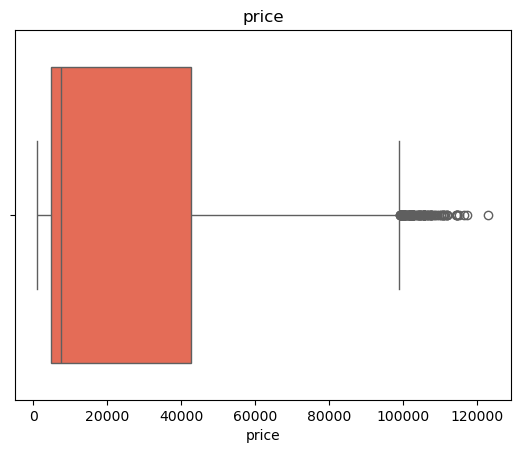

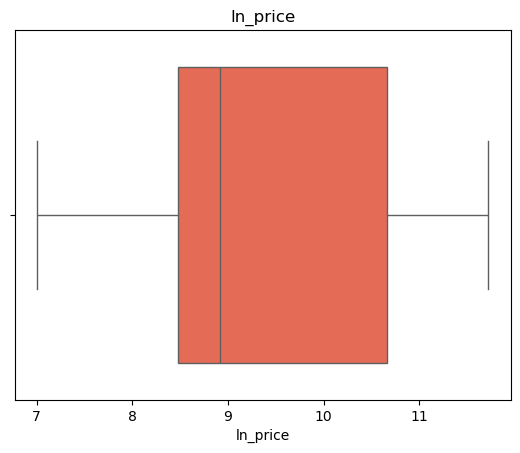

In [122]:
# doing the ln transformation on response
df['ln_price'] = np.log(df['price'])

sns.boxplot(data = df, x = 'price', color = '#fc5c3f').set_title('price')
plt.show()

sns.boxplot(data = df, x = 'ln_price', color = '#fc5c3f').set_title('ln_price')
plt.show()

In [123]:
# creating a new variable 'source_dest' using the source and destination data
df['source_dest'] = df['source_city'] + 'To' + df['destination_city']
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ln_price,source_dest
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,DelhiToMumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,DelhiToMumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,DelhiToMumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,DelhiToMumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,DelhiToMumbai
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,8.691986,DelhiToMumbai
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,8.709465,DelhiToMumbai
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060,8.709465,DelhiToMumbai
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954,8.691819,DelhiToMumbai
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954,8.691819,DelhiToMumbai


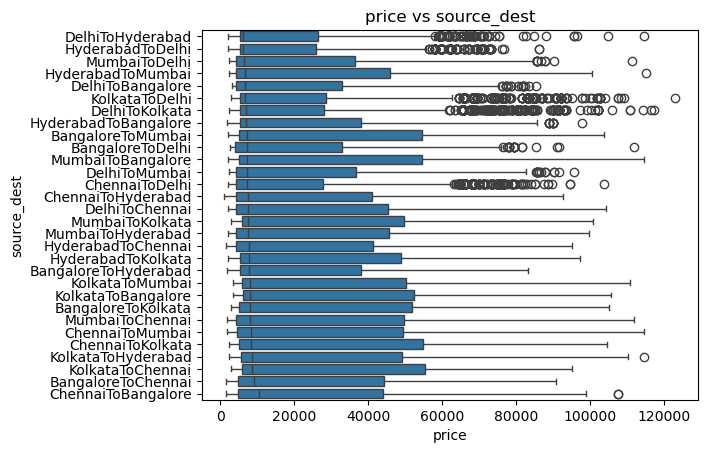

Duration vs Source_dest KW test
Kruskal-Wallis H-statistic: 5047.898801083832
P-value: 0.0 



In [124]:
# boxplot of source_dest and price
sns.boxplot(x = "price", y = 'source_dest', data = df, order =df[['price', 'source_dest']].groupby(['source_dest']).median().sort_values(by=['price']).index).set_title("price vs source_dest")
plt.show()

from scipy.stats import kruskal
# kruskal_wallis between duration and source_dest
groups = [df['price'][df['source_dest'] == i] for i in df['source_dest'].unique()]
statistic, p_value = kruskal(*groups)
print("Duration vs Source_dest KW test")
print("Kruskal-Wallis H-statistic:", statistic)
print("P-value:", p_value, '\n')

In [125]:
# making new categories from days left variable by considering weeks
df['weeks_left'] = [0] * len(df)
for i in range(len(df)):
    if df['days_left'][i] <= 7:
        df['weeks_left'][i] = 'w1'
    elif df['days_left'][i] > 7 and df['days_left'][i] <= 14:
        df['weeks_left'][i] = 'w2'
    elif df['days_left'][i] > 14 and df['days_left'][i] <= 21:
        df['weeks_left'][i] = 'w3'
    elif df['days_left'][i] > 21 and df['days_left'][i] <= 28:
        df['weeks_left'][i] = 'w4'
    elif df['days_left'][i] > 28 and df['days_left'][i] <= 35:
        df['weeks_left'][i] = 'w5'
    elif df['days_left'][i] > 35 and df['days_left'][i] <= 42:
        df['weeks_left'][i] = 'w6'
    else:
        df['weeks_left'][i] = 'w7'

df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ln_price,source_dest,weeks_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651,DelhiToMumbai,w1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651,DelhiToMumbai,w1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8.692154,DelhiToMumbai,w1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986,DelhiToMumbai,w1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986,DelhiToMumbai,w1
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,8.691986,DelhiToMumbai,w1
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,8.709465,DelhiToMumbai,w1
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060,8.709465,DelhiToMumbai,w1
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954,8.691819,DelhiToMumbai,w1
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954,8.691819,DelhiToMumbai,w1


Text(0.5, 1.0, 'weeks_left vs price')

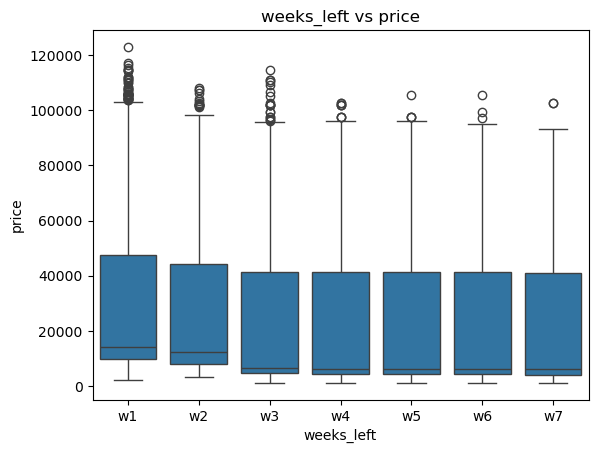

In [126]:
# boxplot of week_left vs price
sns.boxplot(y = "price", x = 'weeks_left', data = df).set_title('weeks_left vs price')

In [127]:
# dropping the source_city, destination_city and days_left variables
df.drop(['source_city', 'destination_city', 'days_left'], axis=1, inplace=True)
df.head()

,airline,flight,departure_time,stops,arrival_time,class,duration,price,ln_price,source_dest,weeks_left
0,SpiceJet,SG-8709,Evening,zero,Night,Economy,2.17,5953,8.691651,DelhiToMumbai,w1
1,SpiceJet,SG-8157,Early_Morning,zero,Morning,Economy,2.33,5953,8.691651,DelhiToMumbai,w1
2,AirAsia,I5-764,Early_Morning,zero,Early_Morning,Economy,2.17,5956,8.692154,DelhiToMumbai,w1
3,Vistara,UK-995,Morning,zero,Afternoon,Economy,2.25,5955,8.691986,DelhiToMumbai,w1
4,Vistara,UK-963,Morning,zero,Morning,Economy,2.33,5955,8.691986,DelhiToMumbai,w1


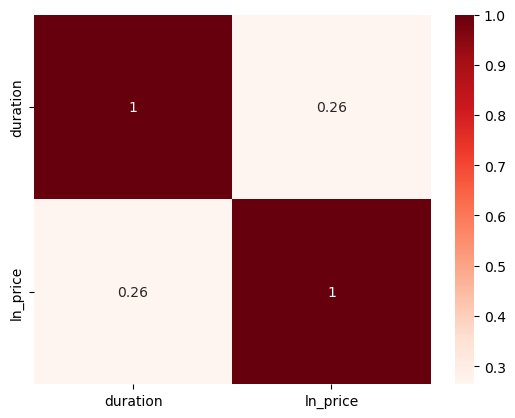

In [128]:
# crrelation between duration and ln_price
num_data = pd.concat([df['duration'], df['ln_price']], axis=1)
sns.heatmap(num_data.corr(), annot = True, cmap="Reds")
plt.show()

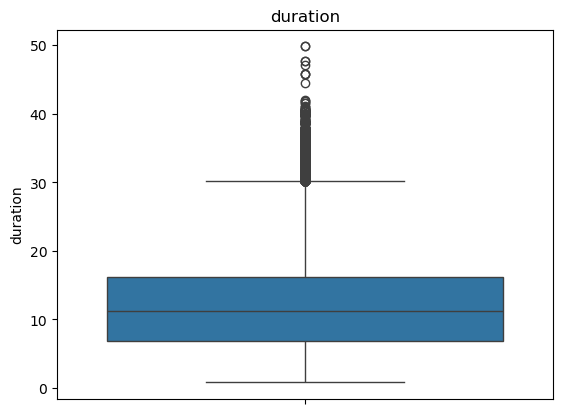

Number of Outliers: 2110
Percentage of Outliers: 0.702974816177083 %


In [129]:
sns.boxplot(df['duration']).set_title('duration')
plt.show()

def identify_outliers(data, k=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_threshold = q1 - k * iqr
    upper_threshold = q3 + k * iqr

    outliers = [x for x in data if x < lower_threshold or x > upper_threshold]

    return len(outliers)

# Example dataset
dataset = df['duration']

num_outliers = identify_outliers(dataset)

print("Number of Outliers:", num_outliers)
print("Percentage of Outliers:", (num_outliers / len(df)) * 100, "%")

In [130]:
# Pearson's Chi square test on categorical data
from scipy.stats import chi2_contingency
 
cat_data= df.select_dtypes(include=['object'])

temp = cat_data.copy().drop(cat_data.columns[0], axis=1)
for col1 in cat_data.columns:
    for col2 in temp.columns:
        crosstab = pd.crosstab(cat_data[col1], cat_data[col2])
        stat, p, d, e = chi2_contingency(crosstab)
        
        print(col1, 'vs', col2, 'Chi-Square Test')
        print('Chi_square Statistic =', stat)
        print('p-value =', p, '\n')
    if (len(temp.columns) >= 1):
        temp = temp.drop(temp.columns[0], axis=1)

airline vs flight Chi-Square Test
Chi_square Statistic = 1500765.0
p-value = 0.0 

airline vs departure_time Chi-Square Test
Chi_square Statistic = 9762.999143131447
p-value = 0.0 

airline vs stops Chi-Square Test
Chi_square Statistic = 18166.156417759023
p-value = 0.0 

airline vs arrival_time Chi-Square Test
Chi_square Statistic = 28932.298024552056
p-value = 0.0 

airline vs class Chi-Square Test
Chi_square Statistic = 60492.80487209428
p-value = 0.0 

airline vs source_dest Chi-Square Test
Chi_square Statistic = 23473.33141057624
p-value = 0.0 

airline vs weeks_left Chi-Square Test
Chi_square Statistic = 1791.14287870546
p-value = 0.0 

flight vs departure_time Chi-Square Test
Chi_square Statistic = 1470876.9247868552
p-value = 0.0 

flight vs stops Chi-Square Test
Chi_square Statistic = 160486.85885435913
p-value = 0.0 

flight vs arrival_time Chi-Square Test
Chi_square Statistic = 335014.672310747
p-value = 0.0 

flight vs class Chi-Square Test
Chi_square Statistic = 72669.6264

# train set test set split and Preprocessing

In [131]:
# getting the train set
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'ln_price'], axis = 1)
y = df['ln_price'] # using the ln transformed price as response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## building the pipeline to preprocess the data

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [133]:
# Custom transformer for frequency encoding
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.mapping = None

    def fit(self, X, y=None):
        self.mapping = X[self.column].value_counts(normalize=True).to_dict()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.column] = X_copy[self.column].map(self.mapping).fillna(0)  # Fill NaN values with 0
        return X_copy[[self.column]]

In [134]:
numerical_features = ['duration']
nominal_features = []
ordinal_features = ['departure_time', 'arrival_time', 'class', 'stops', 'weeks_left']
#frequency_encode_feature = 'flight'
target_encode_feature = ['flight', 'source_dest', 'airline']

# Define preprocessing for numerical, ordinal, and nominal categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()), # Since duration has some outliers
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(categories='auto')), # Ordinal encode ordinal categorical variables
    ('scaler', MinMaxScaler())
])

#frequency_encoding_transformer = Pipeline(steps=[
#    ('frequency_encoder', FrequencyEncoder(column=frequency_encode_feature))  # Frequency encode flight variable
#])

target_encode_transformer = Pipeline(steps=[
    ('target_encode', TargetEncoder(categories = 'auto', smooth= 'auto', target_type='continuous')),
    ('scaler', MinMaxScaler())
])


#nominal_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode nominal categorical variables
#])

# Using ColumnTransformer to apply different preprocessing steps to numerical, ordinal, and nominal categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        #('freq', frequency_encoding_transformer, [frequency_encode_feature]),
        ('target_encode', target_encode_transformer, target_encode_feature),
        #('nom', nominal_transformer, nominal_features)
    ])

In [135]:
# Define the final pipeline to preprocess the data before fitting the model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

pipeline.fit(X_train, y_train)

# Apply preprocessing to training data
X_train_preprocessed = pipeline.transform(X_train)

# Apply preprocessing to testing data
X_test_preprocessed = pipeline.transform(X_test)

In [136]:
#from lazypredict.Supervised import LazyRegressor
#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, random_state=42)
#models, predictions = reg.fit(X_train_preprocessed, X_test_preprocessed, y_train, y_test)
#models.head(10)

# Fitting ML models on processed data

In [137]:
# creating objects for each Machine Learning algorithm
model_MLR = LinearRegression()
model_Ridge = Ridge(random_state=42)
model_Lasso = Lasso(alpha=0.1, random_state=42)
model_Elastic = ElasticNet(alpha=0.1, random_state=42)

model_DT = DecisionTreeRegressor(max_depth=10, random_state=42)
model_RF = RandomForestRegressor(n_jobs=-1, n_estimators=150, max_depth=10, random_state=42)
model_ET = ExtraTreesRegressor(n_jobs=-1, n_estimators=150, max_depth=10, random_state=42)

model_Bag = BaggingRegressor(n_jobs=-1, n_estimators=100, random_state=42)

model_XGB = XGBRegressor(n_jobs=-1, max_depth=10, min_child_weight = 1, n_estimators=100, random_state=42) 
model_ADA = AdaBoostRegressor(random_state=42)
model_KNN = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

model_GB = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=42, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [138]:
# list of models
Model_dict = {'MLR': model_MLR, 'Ridge': model_Ridge, 'Lasso': model_Lasso, 'Elastic Net': model_Elastic, 'DecisionTree': model_DT, 
              'RandomForest': model_RF, 'ExtraTrees': model_ET, 'Bagging': model_Bag, 'XGBoost':  model_XGB, 'ADABoost': model_ADA, 
              'KNN':  model_KNN, 'GradientBoost': model_GB}

## evaluation functions

# cros_RMSE (10 fold)
def cross_RMSE(model, X, y):

    mse_scores = []

    for _ in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/10, random_state=42)

        # Train your model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate MSE on the original scale
        mse = mean_squared_error(np.exp(y_val), np.exp(y_pred))
        mse_scores.append(mse)

    # return results
    return np.sqrt(np.mean(mse_scores))

# cros_MAPE
def cross_MAPE(model, X, y):

    mape_scores = []

    for _ in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/10, random_state=42)

        # Train your model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate MSE on the original scale
        mape = mean_absolute_percentage_error(np.exp(y_val), np.exp(y_pred))
        mape_scores.append(mape)

    # return results
    return 100 * np.mean(mape_scores)

# Train and Test RMSE
def RMSE(pred, true):
    rmse = mean_squared_error(true, pred)
    return np.sqrt(rmse)

# Train and Test MAPE
def MAPE(pred, true):
    return mean_absolute_percentage_error(true, pred) * 100

# Table to store the matrics
a={'Model Name':[], 'Training_RMSE':[] ,'Testing_RMSE':[] ,'Training_MAPE':[] ,'Testing_MAPE':[] ,'Accuracy(100 - test_MAPE)':[] ,'Adjusted_Rsquare':[]}
Results=pd.DataFrame(a)

In [139]:
# taking original price values to use in error calulations
y_train_exp = np.exp(y_train)
y_test_exp = np.exp(y_test)

In [140]:
# fit each model and calculating their evaluation scores --> MLR, Ridge, Lasso, ElasticNet
for model_name, model in list(Model_dict.items())[:4]:

    # fit the model
    model.fit(X_train_preprocessed, y_train)
    
    # Predict the model with test data
    y_pred = np.exp(model.predict(X_test_preprocessed))

    # Predict the model with train data
    y_train_pred = np.exp(model.predict(X_train_preprocessed))

    # calculating the evaluation metrics
    train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
    train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
    test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train_exp)-1)/(len(y_train_exp)-X_train.shape[1]-1)

    # entering metrics to the tabel
    new_row = {'Model Name' : model_name,
                'Training_RMSE' : train_RMSE,
                'Testing_RMSE' : test_RMSE,
                'Training_MAPE' : train_MAPE,
                'Testing_MAPE' : test_MAPE,
                'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
                'Adjusted_Rsquare': test_adjR2}

    print(new_row, '\n') 
    Results.loc[len(Results)] = new_row

{'Model Name': 'MLR', 'Training_RMSE': 7766.502756779791, 'Testing_RMSE': 7740.657627665128, 'Training_MAPE': 27.160790860519874, 'Testing_MAPE': 27.49189718470945, 'Accuracy(100 - test_MAPE)': 72.50810281529056, 'Adjusted_Rsquare': 0.8835744175558259} 

{'Model Name': 'Ridge', 'Training_RMSE': 7766.318164356991, 'Testing_RMSE': 7740.522409916869, 'Training_MAPE': 27.16110178028005, 'Testing_MAPE': 27.492137627988082, 'Accuracy(100 - test_MAPE)': 72.50786237201191, 'Adjusted_Rsquare': 0.8835784850829931} 

{'Model Name': 'Lasso', 'Training_RMSE': 11661.020230291675, 'Testing_RMSE': 11629.278815806732, 'Training_MAPE': 45.23495822326005, 'Testing_MAPE': 45.534559503287916, 'Accuracy(100 - test_MAPE)': 54.465440496712084, 'Adjusted_Rsquare': 0.7372163942058344} 

{'Model Name': 'Elastic Net', 'Training_RMSE': 12700.664865925659, 'Testing_RMSE': 12650.573668401517, 'Training_MAPE': 44.94828209651677, 'Testing_MAPE': 45.07386994113552, 'Accuracy(100 - test_MAPE)': 54.92613005886448, 'Adjus

In [141]:
# fit each model and calculating their evaluation scores --> DecisionTree, RandomForest, ExtraTrees
for model_name, model in list(Model_dict.items())[4:7]:

    # fit the model
    model.fit(X_train_preprocessed, y_train)
    
    # Predict the model with test data
    y_pred = np.exp(model.predict(X_test_preprocessed))

    # Predict the model with train data
    y_train_pred = np.exp(model.predict(X_train_preprocessed))

    # calculating the evaluation metrics
    train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
    train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
    test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train_exp)-1)/(len(y_train_exp)-X_train.shape[1]-1)

    # entering metrics to the tabel
    new_row = {'Model Name' : model_name,
                'Training_RMSE' : train_RMSE,
                'Testing_RMSE' : test_RMSE,
                'Training_MAPE' : train_MAPE,
                'Testing_MAPE' : test_MAPE,
                'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
                'Adjusted_Rsquare': test_adjR2}

    print(new_row, '\n') 
    Results.loc[len(Results)] = new_row

{'Model Name': 'DecisionTree', 'Training_RMSE': 4185.323989040032, 'Testing_RMSE': 4168.459387987796, 'Training_MAPE': 15.040103452540771, 'Testing_MAPE': 15.089071677329501, 'Accuracy(100 - test_MAPE)': 84.9109283226705, 'Adjusted_Rsquare': 0.9662367806041291} 

{'Model Name': 'RandomForest', 'Training_RMSE': 4000.912941072613, 'Testing_RMSE': 4019.5342308935556, 'Training_MAPE': 14.552310146737302, 'Testing_MAPE': 14.649907744221679, 'Accuracy(100 - test_MAPE)': 85.35009225577832, 'Adjusted_Rsquare': 0.9686061799485277} 

{'Model Name': 'ExtraTrees', 'Training_RMSE': 4132.88156880819, 'Testing_RMSE': 4155.087467535541, 'Training_MAPE': 15.355925149443545, 'Testing_MAPE': 15.468671450592614, 'Accuracy(100 - test_MAPE)': 84.53132854940739, 'Adjusted_Rsquare': 0.9664530499240369} 



In [143]:
# fit each model and calculating their evaluation scores --> Bagging, XGBoost, ADABoost, KNN, GradientBoost
for model_name, model in list(Model_dict.items())[7:]:

    # fit the model
    model.fit(X_train_preprocessed, y_train)
    
    # Predict the model with test data
    y_pred = np.exp(model.predict(X_test_preprocessed))

    # Predict the model with train data
    y_train_pred = np.exp(model.predict(X_train_preprocessed))

    # calculating the evaluation metrics
    train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
    train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
    test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train_exp)-1)/(len(y_train_exp)-X_train.shape[1]-1)

    # entering metrics to the tabel
    new_row = {'Model Name' : model_name,
                'Training_RMSE' : train_RMSE,
                'Testing_RMSE' : test_RMSE,
                'Training_MAPE' : train_MAPE,
                'Testing_MAPE' : test_MAPE,
                'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
                'Adjusted_Rsquare': test_adjR2}

    print(new_row, '\n') 
    Results.loc[len(Results)] = new_row

{'Model Name': 'Bagging', 'Training_RMSE': 2835.1572544115593, 'Testing_RMSE': 2863.7583244168663, 'Training_MAPE': 8.02884779540243, 'Testing_MAPE': 8.160012574180353, 'Accuracy(100 - test_MAPE)': 91.83998742581964, 'Adjusted_Rsquare': 0.9840645096832689} 

{'Model Name': 'XGBoost', 'Training_RMSE': 2689.032726810478, 'Testing_RMSE': 2730.954764528948, 'Training_MAPE': 8.559337845195502, 'Testing_MAPE': 8.719148178915209, 'Accuracy(100 - test_MAPE)': 91.2808518210848, 'Adjusted_Rsquare': 0.9855082205918528} 

{'Model Name': 'ADABoost', 'Training_RMSE': 5476.090994523716, 'Testing_RMSE': 5388.579174623691, 'Training_MAPE': 30.313902706270422, 'Testing_MAPE': 29.0259691909311, 'Accuracy(100 - test_MAPE)': 70.97403080906889, 'Adjusted_Rsquare': 0.9435789403761656} 

{'Model Name': 'KNN', 'Training_RMSE': 3617.5882539852246, 'Testing_RMSE': 3551.7804693876014, 'Training_MAPE': 11.810881387512714, 'Testing_MAPE': 11.476893131248902, 'Accuracy(100 - test_MAPE)': 88.5231068687511, 'Adjusted_

# Assumption checking in Linear Regression

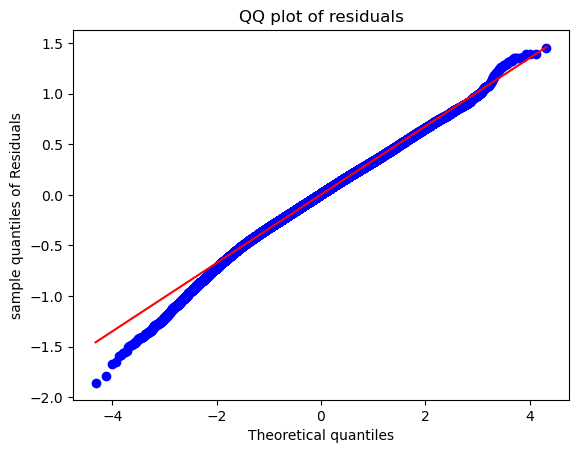

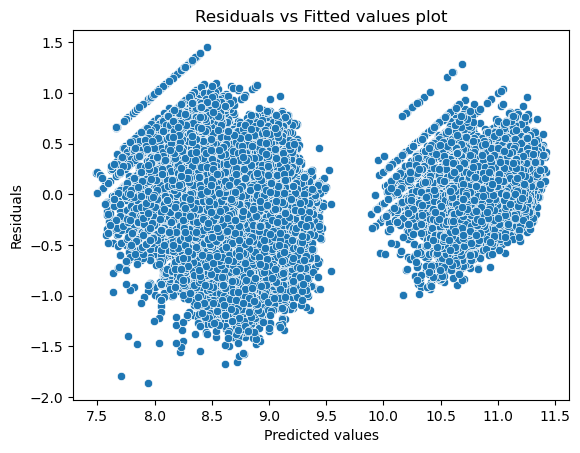

In [144]:
import pylab 
import scipy.stats as stats

# Train the model
model_MLR.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = model_MLR.predict(X_test_preprocessed)

residuals = y_pred - y_test
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title('QQ plot of residuals')
pylab.ylabel('sample quantiles of Residuals')
pylab.show()

sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs Fitted values plot')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add column of constants for VIF function
X_const = pd.DataFrame(add_constant(X_train_preprocessed))

# Compute the variance inflation factor (VIF) for each feature
vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(X_train.shape[1])], index = X_train.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
airline           46.437067
flight             1.501263
departure_time     1.016823
stops              1.010004
arrival_time       1.285384
class              1.310558
duration           1.006146
source_dest        6.767040
weeks_left         1.057423
dtype: float64


# fitting Deep Learning models (ANN and MLP)

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.utils import plot_model

In [147]:
# Define the neural network model
ann_model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_train_preprocessed.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='linear')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann_model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_data=(X_test_preprocessed, y_test), verbose=1)

# Predictions on the test set
y_pred = np.exp(ann_model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(ann_model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = RMSE(y_train_pred, y_train_exp), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = MAPE(y_train_pred, y_train_exp), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : 'ANN (deep learning)',
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE, 
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Results.loc[len(Results)] = new_row



Epoch 1/10

6566/6566 [==============================] - 16s 2ms/step - loss: 0.6231 - val_loss: 0.0670
Epoch 2/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0666 - val_loss: 0.0827
Epoch 3/10
6566/6566 [==============================] - 15s 2ms/step - loss: 0.0614 - val_loss: 0.0574
Epoch 4/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0606 - val_loss: 0.0558
Epoch 5/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0594 - val_loss: 0.0556
Epoch 6/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0589 - val_loss: 0.0606
Epoch 7/10
6566/6566 [==============================] - 15s 2ms/step - loss: 0.0585 - val_loss: 0.0607
Epoch 8/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0581 - val_loss: 0.0552
Epoch 9/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0575 - val_loss: 0.0545
Epoch 10/10
6566/6566 [==============================] - 9s 1ms/step
{

In [148]:
# Define the neural network model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = np.exp(mlp_model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(mlp_model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = RMSE(y_train_pred, y_train_exp), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = MAPE(y_train_pred, y_train_exp), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : 'MLP (deep learning)',
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE, 
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Results.loc[len(Results)] = new_row

{'Model Name': 'MLP (deep learning)', 'Training_RMSE': 4643.1186812170145, 'Testing_RMSE': 4690.179175027393, 'Training_MAPE': 16.40402440130599, 'Testing_MAPE': 16.50109562902332, 'Accuracy(100 - test_MAPE)': 83.49890437097667, 'Adjusted_Rsquare': 0.9572563534894494} 



In [151]:
## initial results
Results.sort_values(by='Accuracy(100 - test_MAPE)', ascending=False)

,Model Name,Training_RMSE,Testing_RMSE,Training_MAPE,Testing_MAPE,Accuracy(100 - test_MAPE),Adjusted_Rsquare
7,Bagging,2835.157254,2863.758324,8.028848,8.160013,91.839987,0.984065
8,XGBoost,2689.032727,2730.954765,8.559338,8.719148,91.280852,0.985508
10,KNN,3617.588254,3551.780469,11.810881,11.476893,88.523107,0.975488
5,RandomForest,4000.912941,4019.534231,14.552310,14.649908,85.350092,0.968606
4,DecisionTree,4185.323989,4168.459388,15.040103,15.089072,84.910928,0.966237
6,ExtraTrees,4132.881569,4155.087468,15.355925,15.468671,84.531329,0.966453
13,MLP (deep learning),4643.118681,4690.179175,16.404024,16.501096,83.498904,0.957256
11,GradientBoost,4595.669277,4657.922585,16.944738,17.208078,82.791922,0.957842
12,ANN (deep learning),4756.293589,4806.519397,17.387334,17.466344,82.533656,0.955110
0,MLR,7766.502757,7740.657628,27.160791,27.491897,72.508103,0.883574


# Best 5 models

* **Random Forest**
* **Bagging Regressor**
* **XGBoost Regressor**
* **KNN Regressor**
* **Artificial Nural Network (ANN)**

# Hyper Parameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV

# Table to store the matrics of best models after parameter tuning
a={'Model Name':[], 'Training_RMSE':[] ,'Testing_RMSE':[] ,'Training_MAPE':[] ,'Testing_MAPE':[] ,'Accuracy(100 - test_MAPE)':[] ,'Adjusted_Rsquare':[]}
Tuned_Results=pd.DataFrame(a)

### Random Forest

In [153]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 8, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search.fit(X_train_preprocessed, y_train)
best_params = grid_search.best_params_

In [154]:
best_params

{'max_depth': 10, 'n_estimators': 200}

In [155]:
# fitting the model using the best parameters

model = RandomForestRegressor(n_jobs=-1, max_depth=10, n_estimators=200)
model.fit(X_train_preprocessed, y_train)
    
# Predict the model with test data
y_pred = np.exp(model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : "RandomForest",
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Tuned_Results.loc[len(Tuned_Results)] = new_row

{'Model Name': 'RandomForest', 'Training_RMSE': 4005.5333921846036, 'Testing_RMSE': 4014.9331465413106, 'Training_MAPE': 14.544736599718433, 'Testing_MAPE': 14.64742923532381, 'Accuracy(100 - test_MAPE)': 85.35257076467619, 'Adjusted_Rsquare': 0.9686780106303083} 



### Bagging Regressor

In [156]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(estimator=BaggingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_preprocessed, y_train)
best_params = grid_search.best_params_

In [157]:
best_params 

{'max_samples': 0.5, 'n_estimators': 200}

In [158]:
# fitting the model using the best parameters

model = BaggingRegressor(n_jobs=-1, max_samples=0.5, n_estimators=200, random_state=42)
model.fit(X_train_preprocessed, y_train)
    
# Predict the model with test data
y_pred = np.exp(model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : "Bagging",
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Tuned_Results.loc[len(Tuned_Results)] = new_row

{'Model Name': 'Bagging', 'Training_RMSE': 2749.6302110752044, 'Testing_RMSE': 2793.271906181733, 'Training_MAPE': 8.130108842150156, 'Testing_MAPE': 8.22984687077286, 'Accuracy(100 - test_MAPE)': 91.77015312922714, 'Adjusted_Rsquare': 0.9848393043874025} 



In [1]:
import dill
dill.load_session('notebook_env.db')

### XGBoost Regressor

In [5]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [150, 175, 200],
    'max_depth': [4, 7, 10]
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_preprocessed, y_train)
best_params = grid_search.best_params_

In [6]:
best_params 

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}

In [4]:
# fitting the model using the best parameters

model = XGBRegressor(n_jobs=-1, learning_rate=0.2, n_estimators=150, max_depth=10)
model.fit(X_train_preprocessed, y_train)
    
# Predict the model with test data
y_pred = np.exp(model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : "XGBoost",
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Tuned_Results.loc[len(Tuned_Results)] = new_row

{'Model Name': 'XGBoost', 'Training_RMSE': 2673.5374772412947, 'Testing_RMSE': 2724.4700097209025, 'Training_MAPE': 8.456856389402104, 'Testing_MAPE': 8.661725400498515, 'Accuracy(100 - test_MAPE)': 91.33827459950149, 'Adjusted_Rsquare': 0.985576961431556} 



### KNN Regressor

In [7]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_preprocessed, y_train)
best_params = grid_search.best_params_

In [8]:
best_params

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [9]:
# fitting the model using the best parameters

model = KNeighborsRegressor(n_jobs=-1, n_neighbors=7, p=1, weights='distance')
model.fit(X_train_preprocessed, y_train)
    
# Predict the model with test data
y_pred = np.exp(model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = cross_RMSE(model, X_train_preprocessed, y_train), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = cross_MAPE(model, X_train_preprocessed, y_train), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : "KNeighbors",
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE,
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Tuned_Results.loc[len(Tuned_Results)] = new_row

{'Model Name': 'KNeighbors', 'Training_RMSE': 3126.22681772715, 'Testing_RMSE': 3086.0553055552678, 'Training_MAPE': 8.540354864224843, 'Testing_MAPE': 8.625644685603527, 'Accuracy(100 - test_MAPE)': 91.37435531439647, 'Adjusted_Rsquare': 0.9814945303634071} 



### ANN

In [12]:
from scikeras.wrappers import KerasRegressor

# Define the neural network model
def ann_model(units_layer1=64, units_layer2=32, units_layer3=16, activation='relu', learning_rate=0.01):
    model = Sequential([
        Dense(units=units_layer1, activation=activation, input_dim=X_train_preprocessed.shape[1]),
        Dense(units=units_layer2, activation=activation),
        Dense(units=1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the Keras model in a scikit-learn regressor
ann_regressor = KerasRegressor(build_fn=ann_model, epochs=10, batch_size=32, verbose=0,
                               units_layer1=64, units_layer2=32, units_layer3=16, activation='relu', learning_rate=0.01)

# Define the parameter grid
param_grid = {
    'units_layer2': [48, 32, 16],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ann_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train_preprocessed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [13]:
best_params

{'activation': 'tanh', 'learning_rate': 0.01, 'units_layer2': 48}

In [29]:
# Define the best neural network model
ann_model = Sequential([
    Dense(units=64, activation='tanh', input_dim=X_train_preprocessed.shape[1]),
    Dense(units=48, activation='tanh'),
    Dense(units=32, activation='tanh'),
    Dense(units=1, activation='linear')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
mod = ann_model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_data=(X_test_preprocessed, y_test), verbose=1, use_multiprocessing=True)

# Predictions on the test set
y_pred = np.exp(ann_model.predict(X_test_preprocessed))

# Predict the model with train data
y_train_pred = np.exp(ann_model.predict(X_train_preprocessed))

# calculating the evaluation metrics
train_RMSE, test_RMSE = RMSE(y_train_pred, y_train_exp), RMSE(y_pred, y_test_exp)
train_MAPE, test_MAPE = MAPE(y_train_pred, y_train_exp), MAPE(y_pred, y_test_exp)
test_adjR2 = 1 - (1-r2_score(y_test_exp, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

# entering metrics to the tabel
new_row = {'Model Name' : 'ANN (deep learning)',
            'Training_RMSE' : train_RMSE,
            'Testing_RMSE' : test_RMSE,
            'Training_MAPE' : train_MAPE,
            'Testing_MAPE' : test_MAPE,
            'Accuracy(100 - test_MAPE)' : 100 - test_MAPE, 
            'Adjusted_Rsquare': test_adjR2}

print(new_row, '\n') 
Tuned_Results.loc[len(Tuned_Results)] = new_row

Epoch 1/10
6566/6566 [==============================] - 15s 2ms/step - loss: 0.3823 - val_loss: 0.0722
Epoch 2/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0662 - val_loss: 0.0620
Epoch 3/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0599 - val_loss: 0.0595
Epoch 4/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0574 - val_loss: 0.0555
Epoch 5/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0559 - val_loss: 0.0545
Epoch 6/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0550 - val_loss: 0.0548
Epoch 7/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0545 - val_loss: 0.0528
Epoch 8/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0538 - val_loss: 0.0529
Epoch 9/10
6566/6566 [==============================] - 14s 2ms/step - loss: 0.0534 - val_loss: 0.0548
Epoch 10/10
6566/6566 [==============================] - 9s 1ms/step
{'Mo

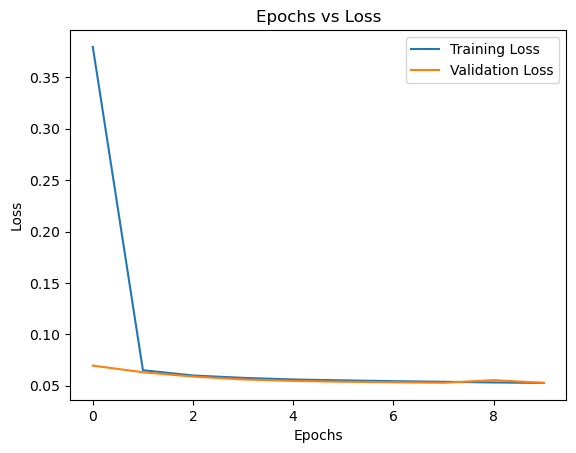

In [27]:
# Plot the training loss over epochs
plt.plot(mod.history['loss'], label='Training Loss')
plt.plot(mod.history['val_loss'], label='Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# tuned results among selected models
Tuned_Results.sort_values(by='Accuracy(100 - test_MAPE)', ascending=False)

,Model Name,Training_RMSE,Testing_RMSE,Training_MAPE,Testing_MAPE,Accuracy(100 - test_MAPE),Adjusted_Rsquare
1,Bagging,2749.630211,2793.271906,8.130109,8.229847,91.770153,0.984839
3,KNeighbors,3126.226818,3086.055306,8.540355,8.625645,91.374355,0.981495
2,XGBoost,2673.537477,2724.470010,8.456856,8.661725,91.338275,0.985577
0,RandomForest,4005.533392,4014.933147,14.544737,14.647429,85.352571,0.968678
4,ANN (deep learning),4685.203532,4717.858834,16.315918,16.350367,83.649633,0.956750
